In [42]:
import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

# Exploratory Data Analysis

In [83]:
data = pd.read_csv('retail_sales_dataset.csv')

In [84]:
print(data.head())

   Transaction ID        Date Customer ID  Gender  Age Product Category  \
0               1  2023-11-24     CUST001    Male   34           Beauty   
1               2  2023-02-27     CUST002  Female   26         Clothing   
2               3  2023-01-13     CUST003    Male   50      Electronics   
3               4  2023-05-21     CUST004    Male   37         Clothing   
4               5  2023-05-06     CUST005    Male   30           Beauty   

   Quantity  Price per Unit  Total Amount  
0         3              50           150  
1         2             500          1000  
2         1              30            30  
3         1             500           500  
4         2              50           100  


In [85]:
data.shape

(1000, 9)

In [86]:
data['Gender'].value_counts()

Female    510
Male      490
Name: Gender, dtype: int64

In [87]:
data['Product Category'].value_counts()

Clothing       351
Electronics    342
Beauty         307
Name: Product Category, dtype: int64

In [88]:
data['Quantity'].value_counts()

4    263
1    253
2    243
3    241
Name: Quantity, dtype: int64

In [89]:
T_amount=data['Total Amount'].sum()
T_amount

456000

In [90]:
data.skew()

C:\Users\admin\AppData\Local\Temp\ipykernel_9132\1188251951.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  data.skew()


Transaction ID    0.000000
Age              -0.048812
Quantity         -0.014036
Price per Unit    0.736308
Total Amount      1.376128
dtype: float64

In [91]:
data.kurt()

C:\Users\admin\AppData\Local\Temp\ipykernel_9132\2907027414.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  data.kurt()


Transaction ID   -1.200000
Age              -1.201212
Quantity         -1.392867
Price per Unit   -1.138996
Total Amount      0.815031
dtype: float64

# Data cleaning

In [92]:
print("Missing Values:")
print(data.isnull().sum())

Missing Values:
Transaction ID      0
Date                0
Customer ID         0
Gender              0
Age                 0
Product Category    0
Quantity            0
Price per Unit      0
Total Amount        0
dtype: int64


In [93]:
retail_df = data.dropna()

In [94]:
print(retail_df.duplicated().sum())

0


In [95]:
retail_df.drop_duplicates(inplace=True)

# Calculate basic statistics

In [49]:

mean_price = retail_df['Price per Unit'].mean()
median_quantity = retail_df['Quantity'].median()
mode_age = retail_df['Age'].mode().values[0]
std_total_amount = retail_df['Total Amount'].std()


print("Descriptive Statistics:")
print(f"Mean Price per Unit: {mean_price}")
print(f"Median Quantity: {median_quantity}")
print(f"Mode Age: {mode_age}")
print(f"Standard Deviation of Total Amount: {std_total_amount}")

Descriptive Statistics:
Mean Price per Unit: 179.89
Median Quantity: 3.0
Mode Age: 43
Standard Deviation of Total Amount: 559.997631555123


In [50]:
retail_df.describe()

,Transaction ID,Age,Quantity,Price per Unit,Total Amount
count,1000.000000,1000.00000,1000.000000,1000.000000,1000.000000
mean,500.500000,41.39200,2.514000,179.890000,456.000000
std,288.819436,13.68143,1.132734,189.681356,559.997632
min,1.000000,18.00000,1.000000,25.000000,25.000000
25%,250.750000,29.00000,1.000000,30.000000,60.000000
50%,500.500000,42.00000,3.000000,50.000000,135.000000
75%,750.250000,53.00000,4.000000,300.000000,900.000000
max,1000.000000,64.00000,4.000000,500.000000,2000.000000


In [97]:
Category= data.groupby('Product Category')['Quantity'].sum().sort_values(ascending = False)
Category

Product Category
Clothing       894
Electronics    849
Beauty         771
Name: Quantity, dtype: int64

# Analysis

<AxesSubplot:xlabel='Product Category'>

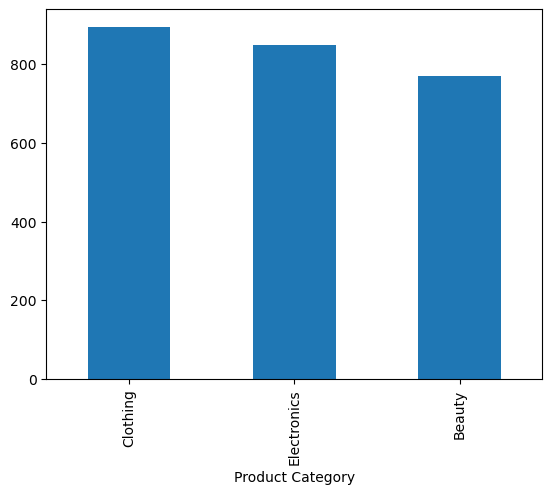

In [99]:
Category[:5].plot(kind = 'bar') 

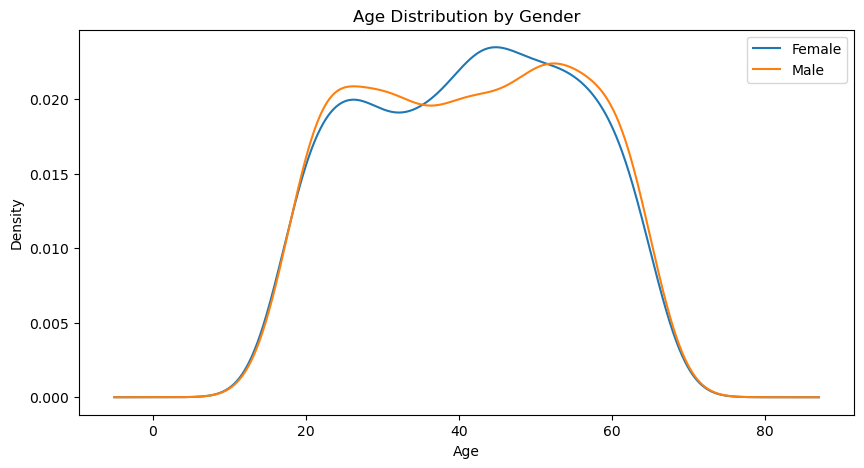

In [53]:

plt.figure(figsize=(10, 5))
retail_df.groupby('Gender')['Age'].plot(kind='kde', legend=True)
plt.title('Age Distribution by Gender')
plt.xlabel('Age')
plt.ylabel('Density')
plt.show()

Index(['Transaction ID', 'Date', 'Customer ID', 'Gender', 'Age',
       'Product Category', 'Quantity', 'Price per Unit', 'Total Amount'],
      dtype='object')


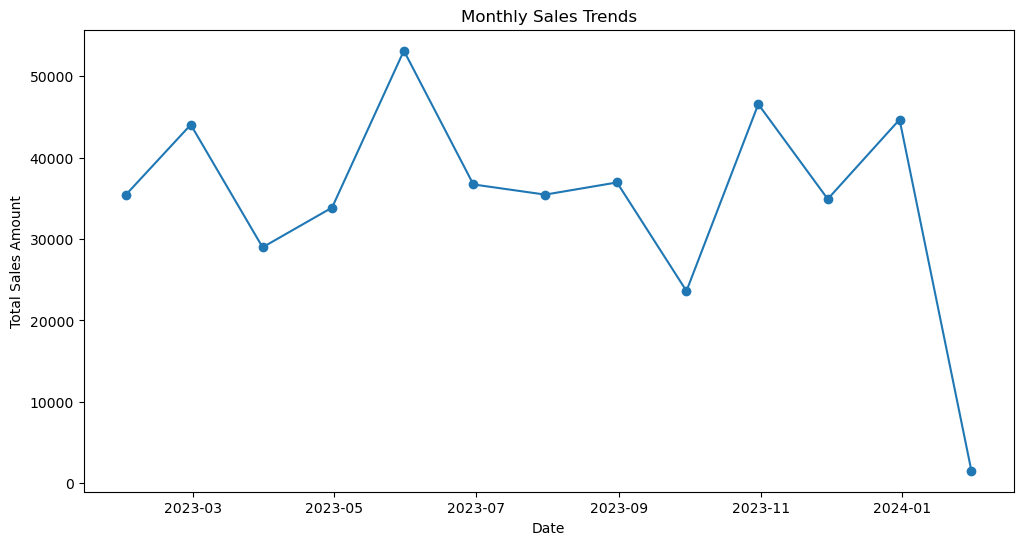

In [55]:
import matplotlib.pyplot as plt


print(retail_df.columns)

retail_df['Date'] = pd.to_datetime(retail_df['Date'])

retail_df.set_index('Date', inplace=True)

monthly_sales = retail_df['Total Amount'].resample('M').sum()

plt.figure(figsize=(12, 6))
plt.plot(monthly_sales, marker='o')
plt.title('Monthly Sales Trends')
plt.xlabel('Date')
plt.ylabel('Total Sales Amount')
plt.show()

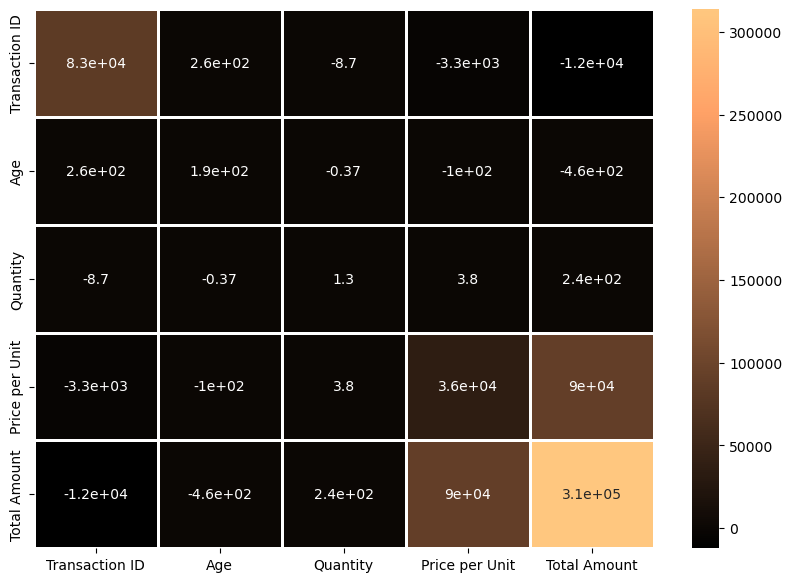

In [67]:
cov=data.cov()
cov

fig,ax=plt.subplots(figsize=(10,7))
sns.heatmap(cov,annot=True,linewidths=0.95,cmap='copper',fmt='.2g')
plt.show()

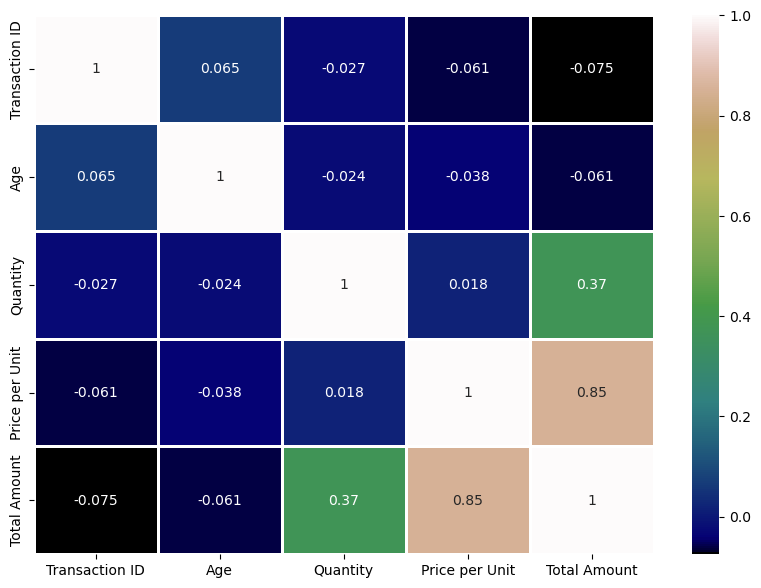

In [70]:
corr=data.corr()
corr

fig,ax=plt.subplots(figsize=(10,7))
sns.heatmap(corr,annot=True,linewidths=0.95,cmap='gist_earth',fmt='.2g')
plt.show()

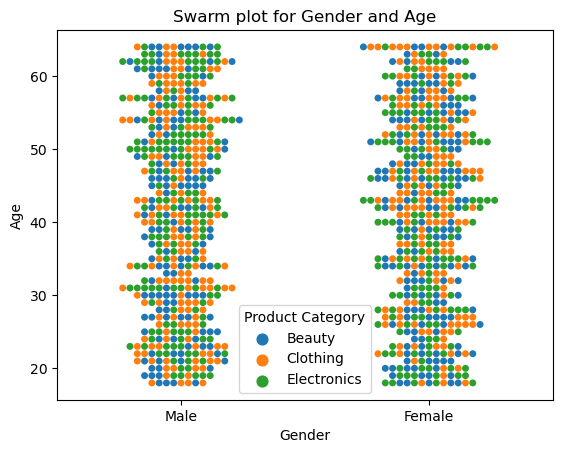

In [71]:
sns.swarmplot(x='Gender',y='Age',hue='Product Category',data=data)
plt.title("Swarm plot for Gender and Age")
plt.show()

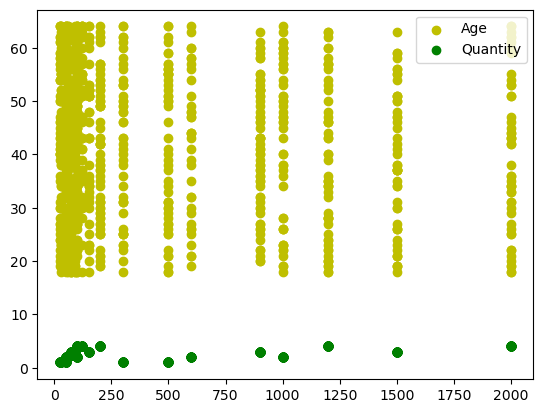

In [76]:
plt.scatter(x='Total Amount',y='Age',color='y',data=data)
plt.scatter(x='Total Amount',y='Quantity',color='g',data=data)
plt.legend()
plt.show()

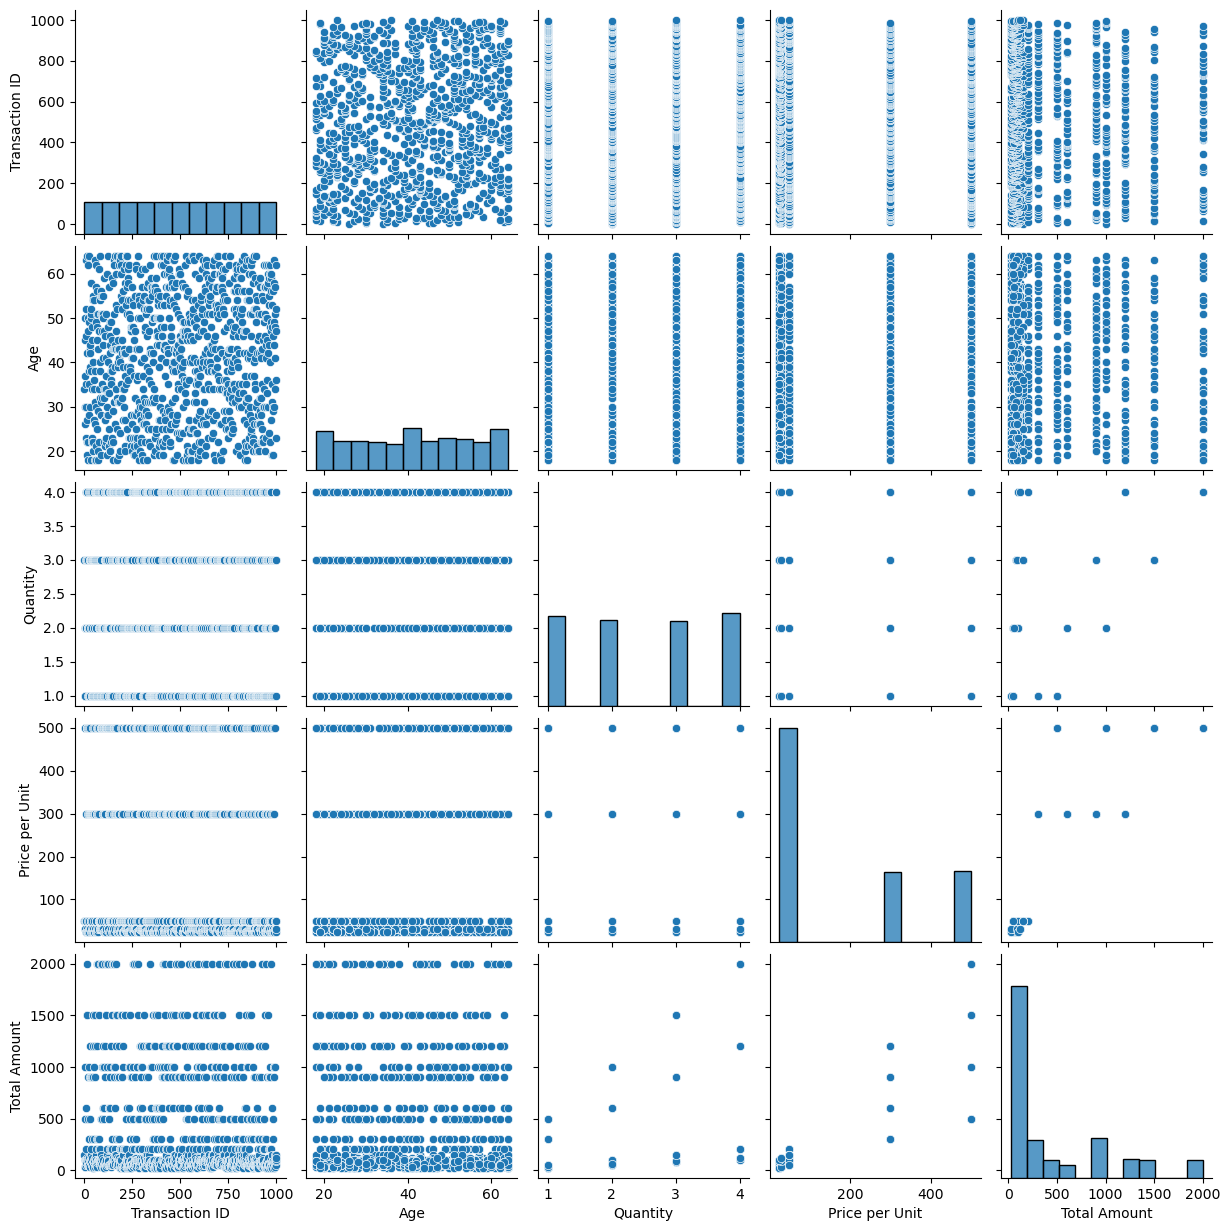

In [96]:
sns.pairplot(data=data)
plt.show()